In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy.special import expit

#### Playground

In [2]:
# Mode == Weights

D_j = 0.5 

player = [0.1, 0.5, 0.9]
player_label = ['safe', 'random', 'risky']

question = [0.9, 0.5, 0.1]
question_label = ['low information', 'medium information', 'high information']

for i,p in enumerate(player):
    for j,q in enumerate(question):
        prob = p * (1-q) + D_j * q
        print(f'Player {player_label[i]} with question {question_label[j]} ---> Prob to answer risky = {prob:.2f}')
    print('')

Player safe with question low information ---> Prob to answer risky = 0.46
Player safe with question medium information ---> Prob to answer risky = 0.30
Player safe with question high information ---> Prob to answer risky = 0.14

Player random with question low information ---> Prob to answer risky = 0.50
Player random with question medium information ---> Prob to answer risky = 0.50
Player random with question high information ---> Prob to answer risky = 0.50

Player risky with question low information ---> Prob to answer risky = 0.54
Player risky with question medium information ---> Prob to answer risky = 0.70
Player risky with question high information ---> Prob to answer risky = 0.86



In [3]:
# Mode == Rasch

player = [0.1, 0.5, 0.9]
player_label = ['safe', 'random', 'risky']

question = [0.1, 0.5, 0.9]
question_label = ['high risk bias', 'medium risk bias', 'low risk bias']

for i,p in enumerate(player):
    for j,q in enumerate(question):
        prob = 1/(1+math.exp(q-p))
        print(f'Player {player_label[i]} with question {question_label[j]} ---> Prob to answer risky = {prob:.2f}')
    print('')

Player safe with question high risk bias ---> Prob to answer risky = 0.50
Player safe with question medium risk bias ---> Prob to answer risky = 0.40
Player safe with question low risk bias ---> Prob to answer risky = 0.31

Player random with question high risk bias ---> Prob to answer risky = 0.60
Player random with question medium risk bias ---> Prob to answer risky = 0.50
Player random with question low risk bias ---> Prob to answer risky = 0.40

Player risky with question high risk bias ---> Prob to answer risky = 0.69
Player risky with question medium risk bias ---> Prob to answer risky = 0.60
Player risky with question low risk bias ---> Prob to answer risky = 0.50



In [4]:
# Mode == Rasch_2

player = [-2, 0, 1]
player_label = ['safe', 'random', 'risky']

question = [0.2, 0.5, 0.9]
question_label = ['low information', 'medium information', 'high information']

for i,p in enumerate(player):
    for j,q in enumerate(question):
        prob = 1/(1+math.exp(-p*q))
        print(f'Player {player_label[i]} with question {question_label[j]} ---> Prob to answer risky = {prob:.2f}')
    print('')

Player safe with question low information ---> Prob to answer risky = 0.40
Player safe with question medium information ---> Prob to answer risky = 0.27
Player safe with question high information ---> Prob to answer risky = 0.14

Player random with question low information ---> Prob to answer risky = 0.50
Player random with question medium information ---> Prob to answer risky = 0.50
Player random with question high information ---> Prob to answer risky = 0.50

Player risky with question low information ---> Prob to answer risky = 0.55
Player risky with question medium information ---> Prob to answer risky = 0.62
Player risky with question high information ---> Prob to answer risky = 0.71



## Simulator

In [5]:
### Inputs 

n_players = 100
prevalence_profiles = [0.3, 0.2, 0.5]  # Must add to 1

D_j = 0.5

n_questions = 15
questions_output = {'risky_answer': 1,
                    'safe_answer' : 0}

profiles_dict = {'risky' : 1,
                 'random': 0,
                 'safe'  : -2}

### Players

class Player:
  def __init__(self, profile='random'):
    self.profile = profile
    self.risk_prob = profiles_dict.get(profile)

  def play_game(self, game, mode='rasch_2'):
    answers_player = []
    for question in game.difficulty_questions:
      if mode == 'weights':
        # Prob. to answer risky = p(i) * (1-W(j)) + D(j) * W(j)
        prob_answer_risky = self.risk_prob * (1-question) + D_j * question
      elif mode == 'rasch':
        # Prob. to answer risky = 1 / 1+e^(Q-P)
        prob_answer_risky = 1/(1 + math.exp(question - self.risk_prob))
      elif mode == 'rasch_2':
        # Prob. to answer risky = 1 / 1+e^(-P*Q)
        prob_answer_risky = 1/(1 + math.exp(-self.risk_prob * question))
      prob_answer_safe = 1 - prob_answer_risky
      answer = np.random.choice(list(questions_output.values()), p=[prob_answer_risky, prob_answer_safe])
      answers_player.append(answer)
    # Add profile
    answers_player.append(self.profile)
    return answers_player


### Game

class Game:
  def __init__(self, n=10):
    low_limit = 0.2
    high_limit = 0.9
    self.difficulty_questions = np.random.uniform(low=low_limit, high=high_limit, size=n)
  
  def get_len_game(self):
    return len(self.difficulty_questions)

In [6]:
# Columns names

columns_names = []
dict_types = {}
for j in range(n_questions):
  name = f'Q_{j+1}'
  dict_types[name] = int
  columns_names.append(name)
columns_names.append('profile')

## Let's Play!!

In [7]:
# Create game
game_1 = Game(n=n_questions)

# Create players
def generate_players(profiles: dict, n_players: int, prevalence: list):
  array_profiles = np.random.choice(list(profiles.keys()), size=n_players, p=prevalence)
  return [Player(prof) for prof in array_profiles]

lst_players = generate_players(profiles=profiles_dict, n_players=n_players, prevalence=prevalence_profiles)

In [8]:
# Create Dataframe
Dataset = pd.DataFrame(columns=columns_names)

# Play!
for participant in lst_players:
  answers = participant.play_game(game_1, mode='rasch_2')
  Dataset.loc[Dataset.shape[0]] = answers

Dataset.to_csv('Data_V1.csv')
Dataset

,Q_1,Q_2,Q_3,Q_4,Q_5,Q_6,Q_7,Q_8,Q_9,Q_10,Q_11,Q_12,Q_13,Q_14,Q_15,profile
0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,safe
1,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0,risky
2,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,safe
3,0,0,0,0,0,1,0,1,1,0,0,1,0,1,0,safe
4,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,safe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,1,1,0,1,0,1,0,0,0,0,1,1,0,0,risky
96,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,random
97,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,safe
98,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,safe


### Analyze the data

In [9]:
data_1 = Dataset[Dataset.columns[:-1]]
questions = [sum(data_1.iloc[:, i]==1) for i in range(data_1.shape[1])]

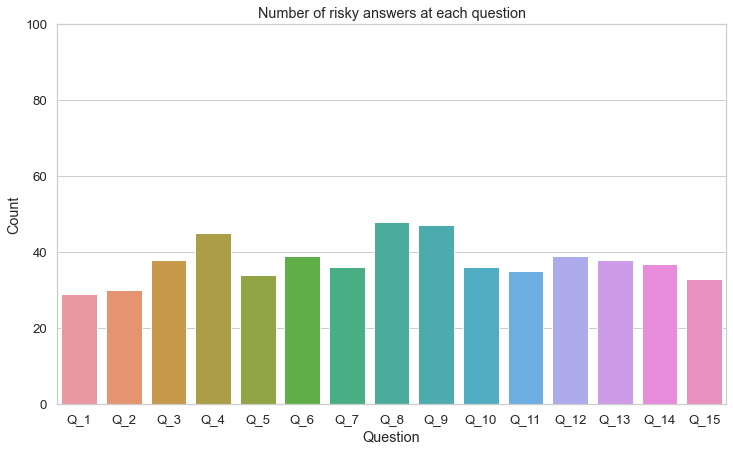

In [10]:
sns.set(font_scale = 1.2)
sns.set_style("whitegrid")
plt.figure(figsize=(12,7))

sns.barplot(x=columns_names[:-1], y=questions)

plt.ylim(0,len(data_1))
plt.xlabel('Question')
plt.ylabel('Count')
plt.title('Number of risky answers at each question')
plt.show()

In [11]:
data_sum = data_1.sum(axis=1)

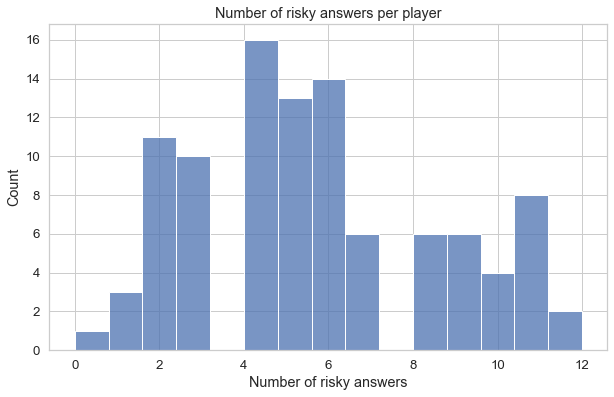

In [12]:
sns.set(font_scale = 1.2)
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))

sns.histplot(data_sum, bins=n_questions)

plt.xlabel('Number of risky answers')
plt.ylabel('Count')
plt.title('Number of risky answers per player')
plt.show()

## Inference: Bayesian Rasch Model

In [ ]:
# Bayesian stuff
import pymc3 as pm
import theano.tensor as tt

with pm.Model() as model:
    
    ## Independent priors
    alpha = pm.Normal('Person', mu = 0, sigma = 3, shape = (1, len(data_1)))
    gamma = pm.Normal('Question', mu = 0, sigma = 3, shape = (data_1.shape[1], 1))
    
    ## Log-Likelihood
    def logp(d):
        v1 = tt.transpose(d) * tt.log(tt.nnet.sigmoid(alpha - (gamma - gamma.mean(0))))
        v2 = tt.transpose((1-d)) * tt.log(1 - tt.nnet.sigmoid(alpha - (gamma - gamma.mean(0))))
        
        return v1 + v2

    ll = pm.DensityDist('ll', logp, observed = {'d': data_1.values})
    trace = pm.sample(1500, cores=-1, step = pm.NUTS())
    trace = trace[250:]
    
pm.plot_trace(trace)
trace_df = pm.trace_to_dataframe(trace)

In [ ]:
trace_df

### Results

In [ ]:
for i in range(n_players):
    # profile
    profile = Dataset.iloc[i,-1] 
    if profile == 'risky':
        color_hist = 'lightcoral'
    elif profile == 'random':
        color_hist = 'khaki'
    elif profile == 'safe':
        color_hist = 'palegreen'
    plt.figure(figsize=(5,1.5))
    plt.grid(True)
    plt.xlim([-4, 4])
    plt.hist(trace_df[trace_df.columns[i]], bins='auto', color=color_hist)
    plt.title(f'Player {i}: {profile} - Mean: {trace_df[trace_df.columns[i]].mean():.4f}')
    plt.show()

In [ ]:
# Expit
for i in range(n_players):
    # profile
    profile = Dataset.iloc[i,-1] 
    if profile == 'risky':
        color_hist = 'lightcoral'
    elif profile == 'random':
        color_hist = 'khaki'
    elif profile == 'safe':
        color_hist = 'palegreen'
    plt.figure(figsize=(5,1.5))
    plt.grid(True)
    plt.xlim([0, 1])
    plt.hist(expit(trace_df[trace_df.columns[i]]), bins='auto', color=color_hist)
    plt.title(f'Player {i}: {profile} - Mean: {expit(trace_df[trace_df.columns[i]]).mean():.4f}')
    plt.show()

In [ ]:
for i in range(n_questions):
    # difficulty
    difficulty = game_1.difficulty_questions[i]
    if 0.66 <= difficulty < 1:
        diff_label = 'Hard'
        color_hist = 'lightcoral'
    elif 0.33 <= difficulty < 0.66:
        diff_label = 'Medium'
        color_hist = 'khaki'
    elif 0 <= difficulty < 0.33:
        diff_label = 'Easy'
        color_hist = 'palegreen'
    plt.figure(figsize=(5,1.5))
    plt.grid(True)
    plt.xlim([-4, 4])
    plt.hist(trace_df[trace_df.columns[i+n_players]], bins='auto', color=color_hist)
    plt.title(f'Question {i}: {difficulty:3.} - Mean: {trace_df[trace_df.columns[i+n_players]].mean():.4f}')
    plt.show()

In [ ]:
# Expit
for i in range(n_questions):
    # difficulty
    difficulty = game_1.difficulty_questions[i]
    if 0.66 <= difficulty < 1:
        diff_label = 'Hard'
        color_hist = 'lightcoral'
    elif 0.33 <= difficulty < 0.66:
        diff_label = 'Medium'
        color_hist = 'khaki'
    elif 0 <= difficulty < 0.33:
        diff_label = 'Easy'
        color_hist = 'palegreen'
    plt.figure(figsize=(5,1.5))
    plt.grid(True)
    plt.xlim([0, 1])
    plt.hist(expit(trace_df[trace_df.columns[i+n_players]]), bins='auto', color=color_hist)
    plt.title(f'Question {i}: {difficulty} - Mean: {expit(trace_df[trace_df.columns[i+n_players]]).mean():.4f}')
    plt.show()